In [6]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')


votes_file = 'votes.csv'

# Our Data is Voting Data

In [7]:
#headers = [class, v1, v2, v3, v4, v5, v6, v7, v8, ... ]
df = pd.read_csv(votes_file, index_col = 0)

In [8]:
#Lower-case all DataFrame column names
df.columns = map(str.lower, df.columns)

In [9]:
df.head() #outputs are "y" and "n", and several NaN

,class,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [10]:
df['class'].value_counts()

democrat      267
republican    168
Name: class, dtype: int64

In [11]:
df.drop(['v2', 'v16'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [12]:
df.shape #(I trimmed down a lot.)

(312, 15)

In [13]:
# convert y and n to 1's and 0s. PCA requires numeric variables. Y is voted, 0 is not voted
dictionary  = {'y':1, 'n':0}
for col in df.columns[1:]:
    df[col] = df[col].map(dictionary)

In [14]:
df.isnull().sum() #sweet, we're good to go

class    0
v1       0
v3       0
v4       0
v5       0
v6       0
v7       0
v8       0
v9       0
v10      0
v11      0
v12      0
v13      0
v14      0
v15      0
dtype: int64

## Pre-processing

In [15]:
nums = df.drop('class', 1) # drop target column

df_new = (nums - nums.mean()) / nums.std() #step 1&2 of PCA

df_new.head() #This is a standardized matrix Z. 

,v1,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15
2,-0.877639,-1.158253,1.106632,0.954558,0.762814,-1.113829,-1.099490,-0.998396,-1.037564,-0.726440,1.128396,0.954558,0.800030,-0.827216
6,-0.877639,0.860602,-0.900747,0.954558,0.762814,-1.113829,-1.099490,-0.998396,-1.037564,-0.726440,-0.883373,0.954558,0.800030,1.205000
9,-0.877639,-1.158253,1.106632,0.954558,0.762814,-1.113829,-1.099490,-0.998396,-1.037564,-0.726440,1.128396,0.954558,0.800030,-0.827216
18,1.135768,0.860602,-0.900747,-1.044248,-1.306734,0.894926,0.906597,0.998396,-1.037564,-0.726440,-0.883373,0.954558,-1.245948,1.205000
20,1.135768,0.860602,-0.900747,-1.044248,-1.306734,0.894926,0.906597,0.998396,-1.037564,1.372164,-0.883373,-1.044248,-1.245948,1.205000


In [16]:
Z=np.cov(df_new,  rowvar=False) # Transposing matrix 

## How to choose the number of components

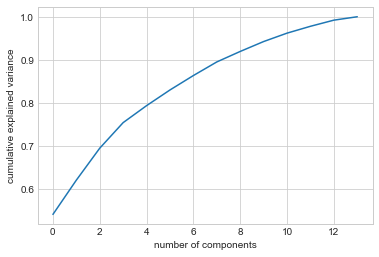

In [17]:
#how to choose the number of components:

pca = PCA().fit(df_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# This curve quantifies how much of the total
# variance is contained within the first N components. 
# we see that it takes around all 7 components to describe 90% of the variance. 


## Decomposition in SKLearn

In [ ]:
# repeat the pre-processing previously done above 

df = pd.read_csv(votes_file, index_col = 0)
df.columns = map(str.lower, df.columns)
df.head() #outputs are "y" and "n", and several NaN
df.drop(['v2', 'v16'], axis = 1, inplace = True)
df.dropna(inplace = True)
dictionary  = {'y':1, 'n':0}
for col in df.columns[1:]:
    df[col] = df[col].map(dictionary)

In [38]:
df1 = df
df1['class'] = df1['class'].map({'republican':1, 'democrat':0})

# Need this to visualize the targets below

In [39]:
def pca_function(data): 
    
    # A function to scale, fit, transform and group our numerical dataset
    
    scaler = StandardScaler()
    scaler.fit(nums) #nums is just our original dataframe minus the target column
    scaled_data = scaler.transform(nums) 
    pca = PCA(n_components = 2) #I just want to keep 2 principal components
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    print(scaled_data.shape)
    print(x_pca.shape) #we care about the number of columns. make sure it says 2
    plt.figure(figsize=(8,6)) 
    plt.scatter(x_pca[:,0], x_pca[:,1], c = df1['class'],  cmap = 'rainbow') 
    #scatterplot of rows from col 0 with rows from col 1
    plt.xlabel('first principal component')
    plt.ylabel('second princopal component')

(312, 14)
(312, 2)


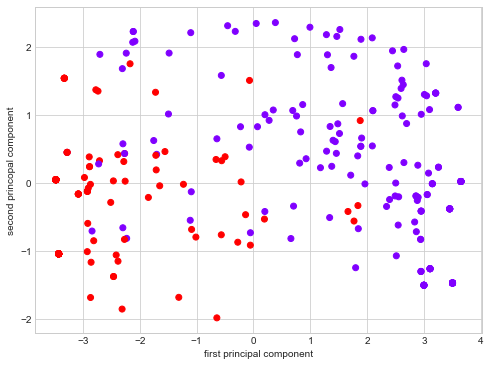

In [40]:
pca_function(df) 

In [41]:
scaler = StandardScaler()
scaler.fit(nums) #nums is just our original dataframe minus the target column (rep and dem)
scaled_data = scaler.transform(nums)
pca = PCA(n_components = 2) #I just want to keep 5 principal components
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data) 

In [42]:
x_pca.shape

(312, 2)

In [43]:
pca.components_ #each row represents a principal component, and each column represents the features

array([[ 0.19579615,  0.29017386, -0.31128973, -0.33198389, -0.27042147,
         0.28316923,  0.32272451,  0.30386302, -0.02466053,  0.070434  ,
        -0.30582228, -0.27698062, -0.28946019,  0.24688083],
       [-0.10421307,  0.16620668, -0.17475625,  0.02054583,  0.30978658,
        -0.06122779,  0.0508912 , -0.03406659,  0.54496687,  0.71053488,
        -0.09594012,  0.08490815,  0.0925323 ,  0.01616291]])

In [44]:
df_component = pd.DataFrame(pca.components_,columns = nums.columns)

In [45]:
df_component # each principal component is listed as a row. 

,v1,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15
0,0.195796,0.290174,-0.311290,-0.331984,-0.270421,0.283169,0.322725,0.303863,-0.024661,0.070434,-0.305822,-0.276981,-0.289460,0.246881
1,-0.104213,0.166207,-0.174756,0.020546,0.309787,-0.061228,0.050891,-0.034067,0.544967,0.710535,-0.095940,0.084908,0.092532,0.016163


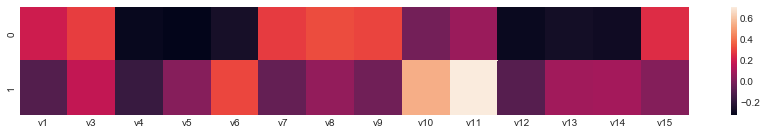

In [46]:
plt.figure(figsize=(15,2)) # Another way to visualize the effects of your components
sns.heatmap(df_component)

## Making Predictions

In [47]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [48]:
df1.columns # note that we have a class column in this dataframe. We'll need to drop it

Index(['class', 'v1', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15'],
      dtype='object')

In [49]:
df1.head()

,class,v1,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15
2,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0
6,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1
9,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0
18,0,1,1,0,0,0,1,1,1,0,0,0,1,0,1
20,0,1,1,0,0,0,1,1,1,0,1,0,0,0,1


In [65]:
# in order to apply a classification model, we have to create test and train samples

sample = np.random.rand(len(df1)) < 0.7
train = df[sample]
test = df[~sample] # ~ stands for "not"

In [66]:
train.shape
test.shape

(214, 15)

In [68]:
pca = PCA(n_components=2) #keep 2 components
lr = LogisticRegression() # the one, the only, logistic regression

In [71]:
pca_train = pca.fit_transform(train.drop("class", axis=1)) 
pca_test = pca.transform(test.drop("class", axis=1)) 

In [73]:
pca_test # this is the same as your x_pca output above, just a smaller fraction of it

In [57]:
df_train = pd.DataFrame(pca_train) #just changing the format, for fitting
df_test = pd.DataFrame(pca_test)  

In [58]:
lr.fit(df_train, train["class"]) #We're comparing "scaled" predictors with target data
pred = lr.predict(df_test) # Predictions were made
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

## Alternatively, we can create a pipeline to do the above in three steps! 

In [64]:
# See SKLearn for details: http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html

In [63]:
pipeline = Pipeline([('pca', pca), ('logistic', lr)])
pipeline.fit(df_train, train["class"])
pred = pipeline.predict(df_test)
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1])